# TrafficTelligence

## Importing Dependencies

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics
import xgboost 
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Importing the CSV File

In [60]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='yA8fM2HPHxIVdnnGAEaRSWjpRFspupwYnrLctqmJQKo3',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'traffictelligence-donotdelete-pr-sad9xevdpo31uu'
object_key = 'traffic volume.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()



,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [61]:
dataset

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918
...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,Clouds,30-09-2018,19:00:00,3543
48200,None,282.76,0.0,0.0,Clouds,30-09-2018,20:00:00,2781
48201,None,282.73,0.0,0.0,Thunderstorm,30-09-2018,21:00:00,2159
48202,None,282.09,0.0,0.0,Clouds,30-09-2018,22:00:00,1450


In [62]:
dataset.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


## Checking and Handling NULL Values

In [64]:
dataset.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

In [65]:
dataset['temp'].fillna(dataset['temp'].mean(), inplace=True)
dataset['rain'].fillna(dataset['rain'].mean(), inplace=True)
dataset['snow'].fillna(dataset['snow'].mean(), inplace=True)

In [66]:
from collections import Counter

In [67]:
print(Counter(dataset['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [68]:
dataset['weather'].fillna('Clouds', inplace =True)

In [69]:
(dataset['weather'])

0              Clouds
1              Clouds
2              Clouds
3              Clouds
4              Clouds
             ...     
48199          Clouds
48200          Clouds
48201    Thunderstorm
48202          Clouds
48203          Clouds
Name: weather, Length: 48204, dtype: object

In [70]:
dataset[["day","month","year"]] = dataset["date"].str.split("-", expand = True)
dataset[["hours","minutes","seconds"]] = dataset["Time"].str.split(":", expand = True)
dataset.drop(columns=['date','Time'], axis=1, inplace = True)

In [71]:
dataset.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
traffic_volume    0
day               0
month             0
year              0
hours             0
minutes           0
seconds           0
dtype: int64

In [72]:
dataset.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,None,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,None,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,None,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,None,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,None,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


In [73]:
dataset.corr()

,temp,rain,snow,traffic_volume
temp,1.000000,0.009070,-0.019758,0.130034
rain,0.009070,1.000000,-0.000090,0.004714
snow,-0.019758,-0.000090,1.000000,0.000735
traffic_volume,0.130034,0.004714,0.000735,1.000000


<AxesSubplot:>

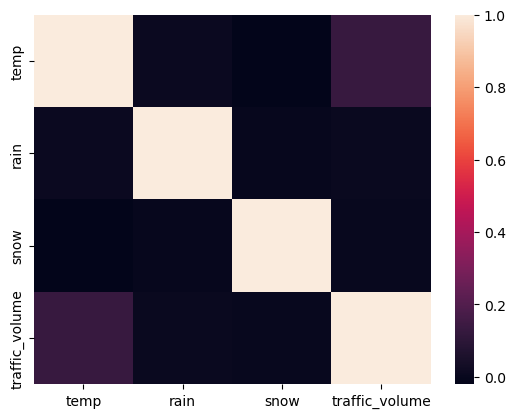

In [74]:
sns.heatmap(dataset.corr())

In [75]:
dataset.describe()

,temp,rain,snow,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.336338,44.789133,0.008168,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.180000,0.000000,0.000000,1193.000000
50%,282.429000,0.000000,0.000000,3380.000000
75%,291.800000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


<AxesSubplot:xlabel='weather', ylabel='count'>

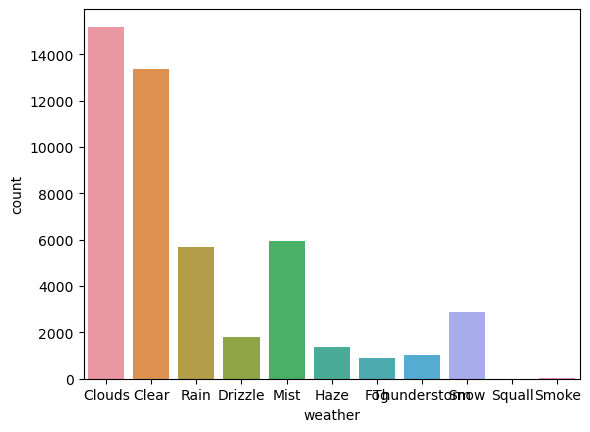

In [76]:
sns.countplot(x='weather', data=dataset)

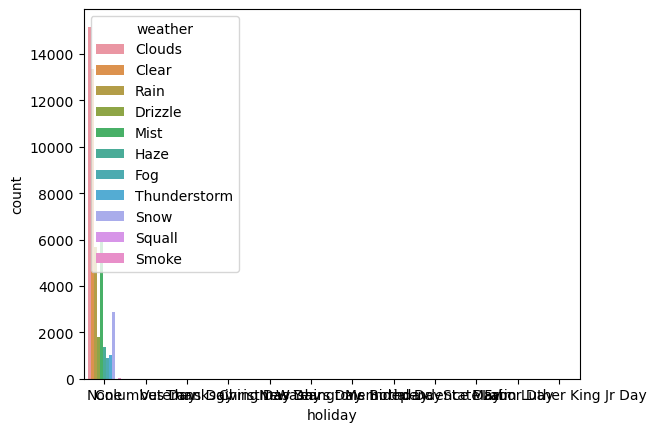

In [77]:
sns.countplot(x='holiday', hue='weather', data=dataset)
plt.show()

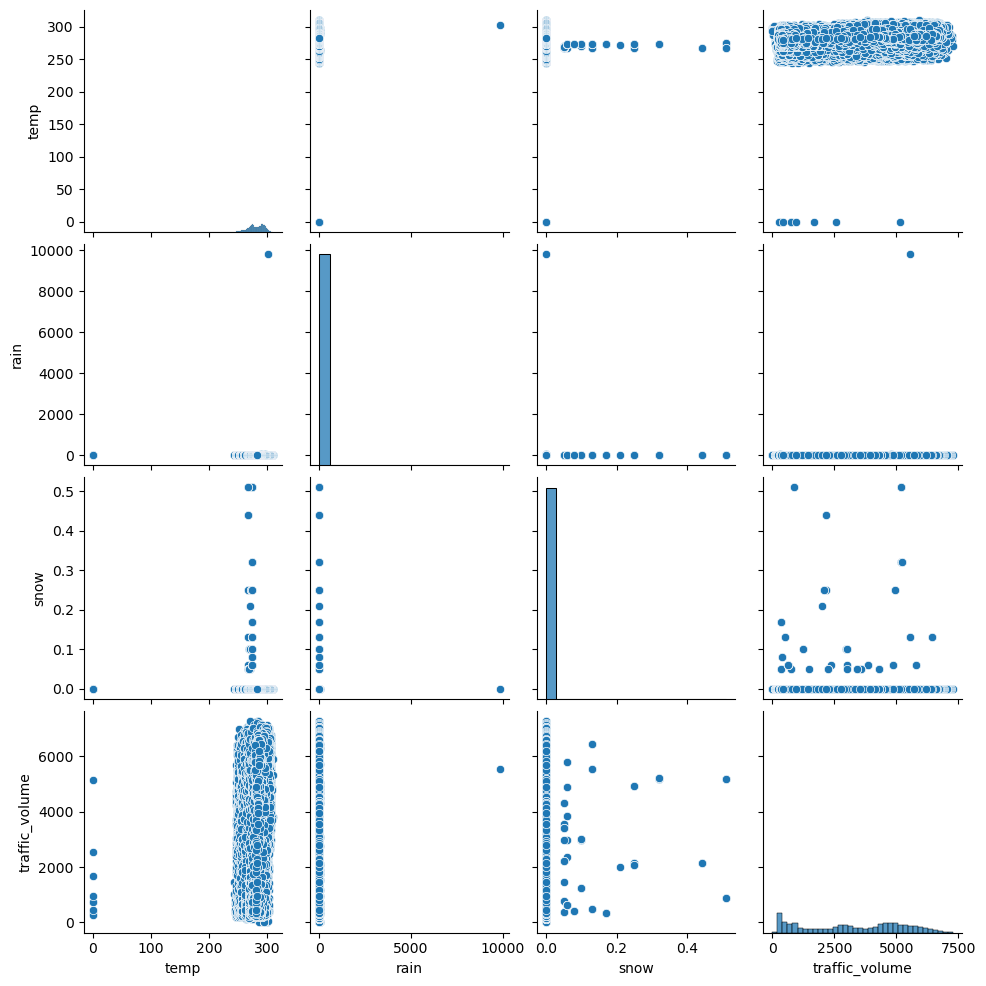

In [78]:
 sns.pairplot(dataset)

## Data Encoding

In [79]:
le = LabelEncoder()
dataset['weather'] = le.fit_transform(dataset['weather'])
dataset['holiday'] = le.fit_transform(dataset['holiday'])

In [80]:
y = dataset['traffic_volume']
x = dataset.drop(columns=['traffic_volume'], axis=1)

In [81]:
names = x.columns
x = scale(x)
x = pd.DataFrame(x, columns = names)
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Initializing and Analyzing Algorithms

In [83]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [84]:
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## Checking Algorithm Metrics

In [85]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [86]:
print(metrics.r2_score(p1, y_train))
print(metrics.r2_score(p2, y_train))
print(metrics.r2_score(p3, y_train))
print(metrics.r2_score(p4, y_train))
print(metrics.r2_score(p5, y_train))

-5.517285423636859
1.0
0.9746743790496518
-12.188104231382287
0.8349874938269883


In [87]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

In [88]:
print(metrics.r2_score(p1, y_test))
print(metrics.r2_score(p2, y_test))
print(metrics.r2_score(p3, y_test))
print(metrics.r2_score(p4, y_test))
print(metrics.r2_score(p5, y_test))

-5.399396398322177
0.6903842659124597
0.8031740958873168
-11.972215715232434
0.7922184852381723


In [89]:
MSE = metrics.mean_squared_error(p3, y_test)

In [90]:
MSE

637498.9541861528

In [91]:
MAE = mean_absolute_error(p3, y_test)

In [92]:
MAE

506.2704397884037

In [93]:
R2 = r2_score(p3, y_test)

In [94]:
R2

0.8031740958873168

In [95]:
np.sqrt(MSE)

798.435316219262

## Creating Model using Pickle

In [96]:
pickle.dump(Rand, open("model.pk1","wb"))
pickle.dump(le, open("encoder.pk1","wb"))

## Using IBM Watson Studio to create an API for Web Application to Fetch Data From

In [97]:
from ibm_watson_machine_learning import APIClient

In [98]:
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"mNWuonLOy5PwWpuKEXHH0Lm9z2o1bFZZtfZFdcPne2eE"
}
client=APIClient(wml_credentials)

In [99]:
def guid_from_space_name(client, space_new):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name'] == space_new)['metadata']['id'])

In [100]:
space_uid = guid_from_space_name(client, 'TrafficTelligenceDeploymentSpace')
print("Space_UID: "+ space_uid)

Space_UID: 2ac4a2a4-1d97-4251-9e5f-3d3a0775859c


In [101]:
client.set.default_space(space_uid)

'SUCCESS'

In [102]:
client.software_specifications.list()

----------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                          ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                 0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10       01ce9391-1a79-5a33-94fb-2e134337f314  base  not_provided
kernel-spark3.2-scala2.12     020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt    069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10      079a91e0-245f-5269-8926-3c20b28f37dc  base  not_provided
scikit-learn_0.20-py3.6       09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12    09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9     0b848dd4-e681-5599-be41-b5f6fccc6471  base  create-unsupported  pytorch-onnx_rt22

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,not_provided,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,not_provided,
5,scikit-learn_0.20-py3.6,09c5a1d0-9c1e-4473-a344-eb7b665ff687,base,unsupported,runtime-22.2-py3.10
6,spark-mllib_3.0-scala_2.12,09f4cff0-90a7-5899-b9ed-1ef348aebdee,base,unsupported,
7,pytorch-onnx_rt22.1-py3.9,0b848dd4-e681-5599-be41-b5f6fccc6471,base,create-unsupported,pytorch-onnx_rt22.2-py3.10
8,ai-function_0.1-py3.6,0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda,base,unsupported,runtime-22.2-py3.10
9,shiny-r3.6,0e6e79df-875e-4f24-8ae9-62dcc2148306,base,not_provided,


In [103]:
software_spec_uid = client.software_specifications.get_uid_by_name('runtime-22.2-py3.10')
software_spec_uid

'b56101f1-309d-549b-a849-eaa63f77b2fb'

In [104]:
from sklearn.ensemble import RandomForestRegressor
c = RandomForestRegressor()

In [105]:
model_details = client.repository.store_model(model= randomforest, meta_props={
    client.repository.ModelMetaNames.NAME:"RandomForest",
    client.repository.ModelMetaNames.TYPE:'scikit-learn_1.1',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_id = client.repository.get_model_id(model_details) 

In [106]:
model_id

'e4a3b34a-b11a-440c-a8be-dac8f2e3eaee'

In [114]:
from sklearn.metrics import accuracy_score

# Assuming you have the actual target values (y_test) and predictions (predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.00010372368011617052


In [107]:
# from sklearn.metrics import accuracy_score

# # Assuming you have predicted labels (y_pred) and actual labels (y_true)
# accuracy = accuracy_score(y_true, y_pred)
# print("Accuracy:", accuracy)


In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [117]:
grid_search = GridSearchCV(estimator=randomforest, param_grid=param_grid, cv=5)

In [118]:
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model for predictions
predictions = best_model.predict(x_test)

In [ ]:
print(grid_search.best_score_)